In [6]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from whatif import Model
from whatif import get_sim_results_df

In [7]:
%matplotlib inline

In [8]:
fixed_cost = 5000
unit_variable_cost = 100
selling_price = 115
spf_constant = 4900
spf_linear = -35
spf_quadratic = 0.06

In [9]:
Demand = (0.06 * (selling_price ** 2)) - (35 * (selling_price)) + 4900
Demand

1668.5

In [10]:
order_cost = fixed_cost + (Demand * unit_variable_cost)
print(order_cost)

sales_revenue = Demand * selling_price
print(sales_revenue)

profit = sales_revenue - order_cost
print(profit)

171850.0
191877.5
20027.5


In [11]:
class SingleProductSPF(Model):
    """Base Model"""
    def __init__(self, fixed_cost = 5000, unit_variable_cost = 100, selling_price = 115, spf_constant = 4900, spf_linear = -35, spf_quadratic = 0.06):
        self.fixed_cost = fixed_cost
        self.unit_variable_cost = unit_variable_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        
    def update(self, param_dict):
        """
        Update parameter values
        """
        for key in param_dict:
            setattr(self, key, param_dict[key])
        
    def demand(self):
        """Compute total demand"""
        return self.spf_quadratic * (self.selling_price ** 2) + self.spf_linear * self.selling_price + self.spf_constant

    def order_cost(self):
        """Compute total order cost"""
        return self.fixed_cost + (self.demand() * self.unit_variable_cost)
    
    def sales_revenue(self):
        """Compute sales revenue"""
        return self.demand() * self.selling_price

    def profit(self):
        '''
        Compute profit
        '''
        profit = self.sales_revenue() - self.order_cost()
        return profit
    def __str__(self):
        """
        String representation of bookstore inputs
        """
        return str(vars(self))
    

In [12]:
model_1 = SingleProductSPF(fixed_cost, unit_variable_cost, selling_price, spf_constant, spf_linear, spf_quadratic)

In [13]:
print(model_1.demand())
print(model_1.order_cost())
print(model_1.sales_revenue())
print(model_1.profit())

1668.5
171850.0
191877.5
20027.5


In [14]:
# Set property equal to an array
model_2 = SingleProductSPF(fixed_cost, unit_variable_cost, selling_price, spf_constant, spf_linear, spf_quadratic)
selling_price_range = np.arange(80, 141, 10)
model_2.selling_price = selling_price_range
model_2.selling_price

array([ 80,  90, 100, 110, 120, 130, 140])

In [15]:
print(model_2.demand())
print(model_2.order_cost())
print(model_2.sales_revenue())
print(model_2.profit())

[2484. 2236. 2000. 1776. 1564. 1364. 1176.]
[253400. 228600. 205000. 182600. 161400. 141400. 122600.]
[198720. 201240. 200000. 195360. 187680. 177320. 164640.]
[-54680. -27360.  -5000.  12760.  26280.  35920.  42040.]


In [16]:
print(model_2)

{'fixed_cost': 5000, 'unit_variable_cost': 100, 'selling_price': array([ 80,  90, 100, 110, 120, 130, 140]), 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}


In [17]:
print(model_2)
updated_input = {'fixed_cost' : 7000, 'unit_variable_cost' : 200, 'selling_price' : 130, 'spf_constant' : 5900, 'spf_linear' : -45, 'spf_quadratic' : 0.08}
model_3 = SingleProductSPF(fixed_cost, unit_variable_cost, selling_price, spf_constant, spf_linear, spf_quadratic)
model_3.update(updated_input)
print(model_3)



{'fixed_cost': 5000, 'unit_variable_cost': 100, 'selling_price': array([ 80,  90, 100, 110, 120, 130, 140]), 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}
{'fixed_cost': 7000, 'unit_variable_cost': 200, 'selling_price': 130, 'spf_constant': 5900, 'spf_linear': -45, 'spf_quadratic': 0.08}


In [18]:
from sklearn.model_selection._search import ParameterGrid

In [19]:
dt_param_ranges = {'selling_price': np.arange(80, 141, 10)}


In [20]:
dt_param_grid = list(ParameterGrid(dt_param_ranges))
print(dt_param_grid)

[{'selling_price': 80}, {'selling_price': 90}, {'selling_price': 100}, {'selling_price': 110}, {'selling_price': 120}, {'selling_price': 130}, {'selling_price': 140}]


In [21]:
from itertools import product

In [22]:
# Look at the key, value pairs (tuples) in dt_param_ranges dictionary
dt_param_ranges.items()

dict_items([('selling_price', array([ 80,  90, 100, 110, 120, 130, 140]))])

In [23]:
print("The original tuples")
print(*dt_param_ranges.items())
print("\nThe zipped tuples")
keys, values = zip(*dt_param_ranges.items())
print(keys, values)

The original tuples
('selling_price', array([ 80,  90, 100, 110, 120, 130, 140]))

The zipped tuples
('selling_price',) (array([ 80,  90, 100, 110, 120, 130, 140]),)


In [24]:
print(values)

(array([ 80,  90, 100, 110, 120, 130, 140]),)


In [25]:
print(list(product(*values)))

[(80,), (90,), (100,), (110,), (120,), (130,), (140,)]


In [26]:
keys

('selling_price',)

In [27]:
list(zip(keys, (80, 140)))

[('selling_price', 80)]

In [28]:
# Demo of getattr for indirect method calling
getattr(model_1, 'profit')()


20027.5

In [29]:
getattr(model_2, 'profit')()

array([-54680., -27360.,  -5000.,  12760.,  26280.,  35920.,  42040.])

In [30]:
def data_table(model, scenario_inputs, outputs):
    '''Create n-inputs by m-outputs data table. 

    Parameters
    ----------
    model : object
        User defined object containing the appropriate methods and properties for computing outputs from inputs
    scenario_inputs : dict of str to sequence
        Keys are input variable names and values are sequence of values for each scenario for this variable.
    outputs : list of str
        List of output variable names

    Returns
    -------
    results_df : pandas DataFrame
        Contains values of all outputs for every combination of scenario inputs
    '''

    # Clone the model using deepcopy
    model_clone = copy.deepcopy(model)
    
    # Create parameter grid
    dt_param_grid = list(ParameterGrid(scenario_inputs))
    
    # Create the table as a list of dictionaries
    results = []

    # Loop over the scenarios
    for params in dt_param_grid:
        # Update the model clone with scenario specific values
        model_clone.update(params)
        # Create a result dictionary based on a copy of the scenario inputs
        result = copy.copy(params)
        # Loop over the list of requested outputs
        for output in outputs:
            # Compute the output.
            out_val = getattr(model_clone, output)()
            # Add the output to the result dictionary
            result[output] = out_val
        
        # Append the result dictionary to the results list
        results.append(result)

    # Convert the results list (of dictionaries) to a pandas DataFrame and return it
    results_df = pd.DataFrame(results)
    return results_df

In [31]:
dt_param_ranges_1 = {'selling_price': np.arange(80, 141, 10)}


# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table
m6_dt1_df = data_table(model_2, dt_param_ranges_1, outputs)
m6_dt1_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


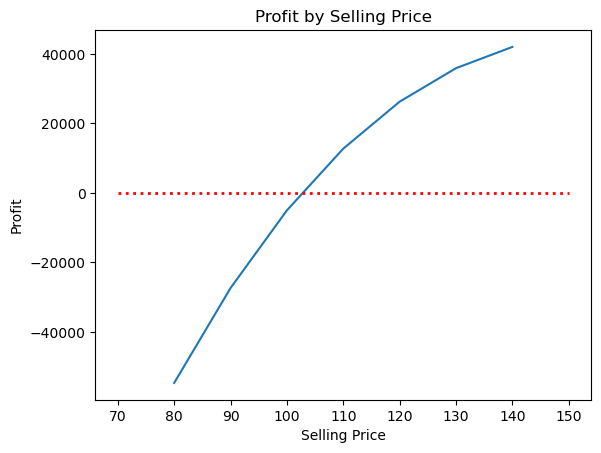

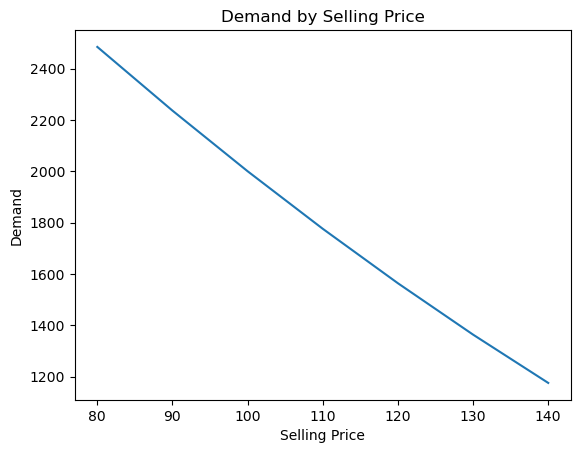

In [51]:
plt.plot(m6_dt1_df['selling_price'], m6_dt1_df['profit'])
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Profit by Selling Price')
plt.hlines(y=0.2, xmin=70, xmax=150, linewidth=2, color='r', linestyles='dotted')
#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show() # Depending on whether you use IPython or interactive mode, etc.

plt.plot(m6_dt1_df['selling_price'], m6_dt1_df['demand'])
plt.xlabel('Selling Price')
plt.ylabel('Demand')
plt.title('Demand by Selling Price')
#plt.hlines(y=0.2, xmin=70, xmax=150, linewidth=2, color='r')
plt.show() # Depending on whether you use IPython or interactive mode, etc.

In [172]:
dt_param_ranges_1 = {'selling_price': np.arange(80, 141, 10)}


# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table
m6_dt1_df = model_2.data_table(dt_param_ranges_1, outputs)
m6_dt1_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


In [53]:
model_2.goal_seek('profit', 0, 'selling_price', 80, 140, N=100)

102.57578606424767

In [50]:
dt_param_ranges_2 = {'selling_price' : np.arange(80, 141, 10),
                    'unit_variable_cost' : np.arange(85, 111, 5)}


# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table
m6_dt2_df = data_table(model_2, dt_param_ranges_2, outputs)
#m6_dt2_df

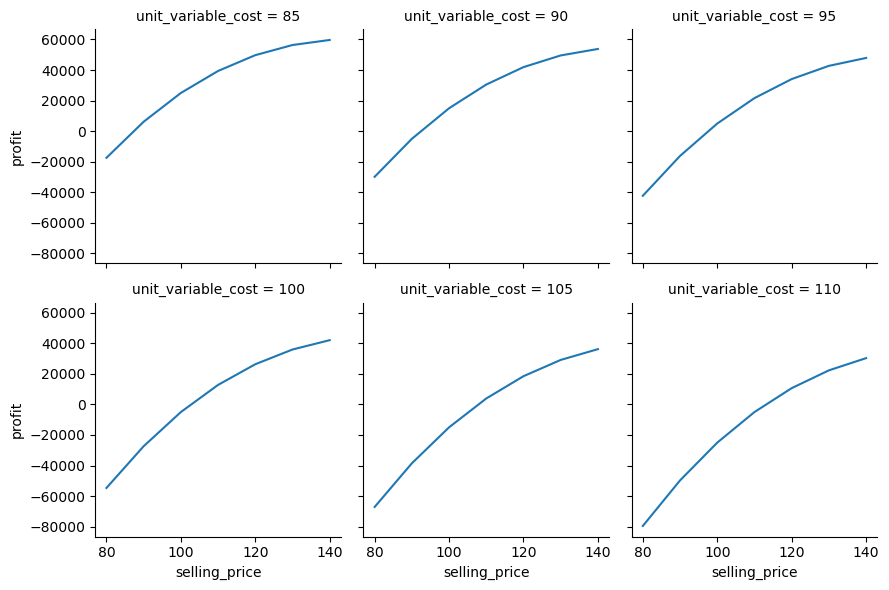

In [34]:
profit_dt_g = sns.FacetGrid(m6_dt2_df, col="unit_variable_cost", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "selling_price", "profit")

In [58]:
dt_param_ranges_1 = {'selling_price': np.arange(80, 251, 10)}


# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table
m6_dt3_df = data_table(model_2, dt_param_ranges_1, outputs)
m6_dt3_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


In [151]:
model_2.goal_seek('profit', 0, 'selling_price', 80, 250, N=100)

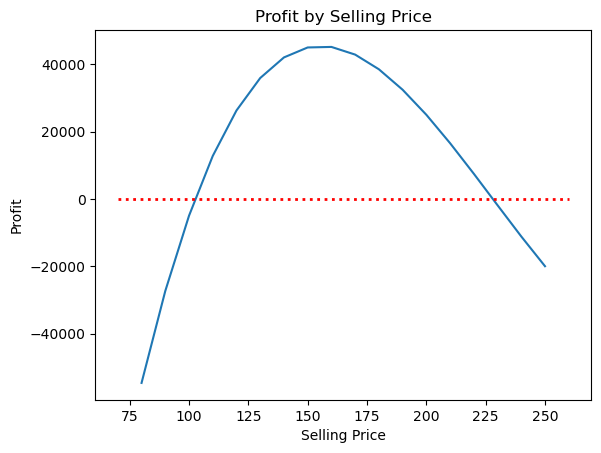

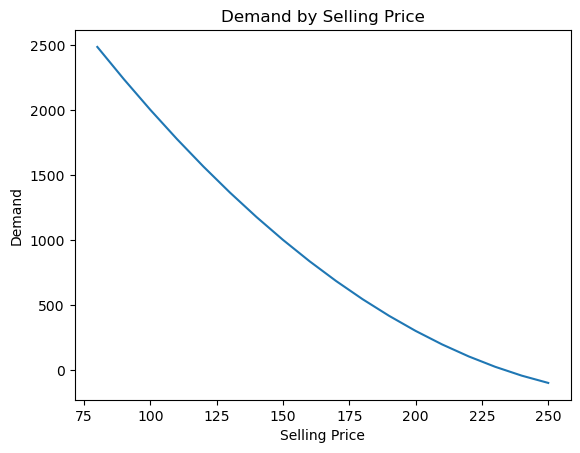

In [65]:
plt.plot(m6_dt3_df['selling_price'], m6_dt3_df['profit'])
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Profit by Selling Price')
plt.hlines(y=0.2, xmin=70, xmax=260, linewidth=2, color='r', linestyles='dotted')
#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show() # Depending on whether you use IPython or interactive mode, etc.

plt.plot(m6_dt3_df['selling_price'], m6_dt3_df['demand'])
plt.xlabel('Selling Price')
plt.ylabel('Demand')
plt.title('Demand by Selling Price')
#plt.hlines(y=0.2, xmin=70, xmax=150, linewidth=2, color='r')
plt.show() # Depending on whether you use IPython or interactive mode, etc.

In [104]:
from numpy.random import default_rng
rg = default_rng(4470)
rand_UVC = rg.uniform(80, 120, 1000)
rand_UVC = np.around(rg.uniform(80, 120, 1000))

rand_UVC[:10]


array([ 98., 116.,  95., 114.,  81.,  93., 115.,  88., 106.,  81.])

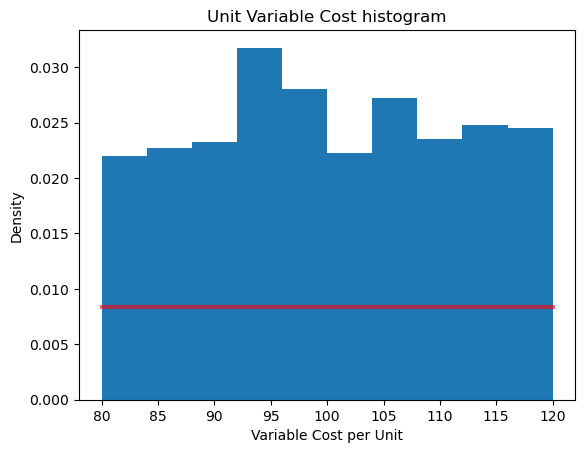

In [88]:

from scipy.stats import uniform

rv_uniform = uniform(loc=80, scale=120)
print(type(rv_normal))

plt.title("Unit Variable Cost histogram")
plt.xlabel("Variable Cost per Unit")
plt.ylabel("Density")
plt.hist(rand_UVC, density=True);

#x_uniform = np.linspace(rv_uniform.ppf(0.0001), rv_uniform.ppf(0.999), 500)

x_uniform = np.linspace(80, 120, 100)

plt.plot(x_uniform, rv_uniform.pdf(x_uniform),
       'r-', lw=3, alpha=0.6, label='Uniform pdf');

Signature:
model_2.simulate(
    random_inputs,
    outputs,
    scenario_inputs=None,
    keep_random_inputs=False,
)
Docstring:
Simulate model for one or more scenarios

Parameters
----------
random_inputs : dict of str to sequence of random variates
    Keys are stochastic input variable names and values are sequence of $n$ random variates, where $n$ is the number of simulation replications
outputs : list of str
    List of output variable names
scenario_inputs : optional (default is None), dict of str to sequence
    Keys are deterministic input variable names and values are sequence of values for each scenario for this variable. Is consumed by
    scikit-learn ParameterGrid() function. See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html
keep_random_inputs : optional (default is False), boolean
    If True, all the random input variates are included in the results dataframe

Returns
-------
results : list of dictionaries
    Values of al

In [122]:
def simulate(model, random_inputs, outputs, scenario_inputs=None, keep_random_inputs=False):
    '''Simulate model for one or more scenarios

    Parameters
    ----------
    model : object
        User defined object containing the appropriate methods and properties for computing outputs from inputs
    random_intputs : dict of str to sequence of random variates
        Keys are stochastic input variable names and values are sequence of $n$ random variates, where $n$ is the number of simulation replications
    outputs : list of str
        List of output variable names
    scenario_inputs : optional (default is None), dict of str to sequence
        Keys are deterministic input variable names and values are sequence of values for each scenario for this variable. Is consumed by
        scikit-learn ParameterGrid() function. See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html
    keep_random_inputs : optional (default is False), boolean
        If True, all the random input variates are included in the results dataframe

    Returns
    -------
    results_df : list of dict
        Values of all outputs for each simulation replication. If `scenario_inputs` is not None, then this is also for every combination of scenario inputs
    '''
    
    # Clone the model
    model_clone = copy.deepcopy(model)
    
    # Update clone with random_inputs
    model_clone.update(random_inputs)
    
    # Store raw simulation input values if desired
    if keep_random_inputs:
        scenario_base_vals = vars(model_clone)
    else:
        scenario_base_vals = vars(model)
    
    # Initialize output counters and containers
    scenario_num = 0
    scenario_results = []
    
    # Check if multiple scenarios
    if scenario_inputs is not None:
        # Create parameter grid for scenario inputs
        sim_param_grid = list(ParameterGrid(scenario_inputs))
        
        # Scenario loop
        for params in sim_param_grid:
            model_clone.update(params)
            # Initialize scenario related outputs
            result = {}
            scenario_vals = copy.copy(params)
            result['scenario_base_vals'] = scenario_base_vals
            result['scenario_num'] = scenario_num
            result['scenario_vals'] = scenario_vals
            raw_output = {}
            
            # Output measure loop
            for output_name in outputs:
                output_array = getattr(model_clone, output_name)()
                raw_output[output_name] = output_array
            
            # Gather results for this scenario
            result['output'] = raw_output
            scenario_results.append(result)
            scenario_num += 1
                
        return scenario_results

    else:
        # Similar logic to above, but only a single scenario
        results = []
        result = {}

        result['scenario_base_vals'] = scenario_base_vals
        result['scenario_num'] = scenario_num
        result['scenario_vals'] = {}
        
        raw_output = {}
        for output_name in outputs:
            output_array = getattr(model_clone, output_name)()
            raw_output[output_name] = output_array
            
        result['output'] = raw_output  
        results.append(result)

        return results

In [145]:
#model_2.simulate?

fixed_cost = 5000
unit_variable_cost = 100
selling_price = 115
spf_constant = 4900
spf_linear = -35
spf_quadratic = 0.06
random_inputs = {'unit_variable_cost': rg.uniform(80, 120, 100)}

model_3 = SingleProductSPF(fixed_cost, unit_variable_cost, selling_price, spf_constant, spf_linear, spf_quadratic)

sim_outputs = ['profit']

In [150]:
pd.Series(model_3.profit()).describe()

count        1.0
mean     20027.5
std          NaN
min      20027.5
25%      20027.5
50%      20027.5
75%      20027.5
max      20027.5
dtype: float64

In [147]:
model2_results = simulate(model_3, random_inputs, sim_outputs)

In [152]:

model_3_result = model_3.simulate(random_inputs, sim_outputs)

In [153]:
model_3_result

[{'scenario_base_vals': {'fixed_cost': 5000,
   'unit_variable_cost': 100,
   'selling_price': 115,
   'spf_constant': 4900,
   'spf_linear': -35,
   'spf_quadratic': 0.06},
  'scenario_num': 0,
  'scenario_vals': {},
  'output': {'profit': array([  9451.44809374,  42952.18308054,  19367.5735289 ,  20208.90132823,
           47251.8531236 ,  29217.31019425,  40418.37152227,  50112.32702124,
           50779.68664792,  35217.08457801,  27846.09591905,  51695.66916316,
            5293.51792786, -10914.87042643,  24229.58927688,  -3119.25463626,
           -5307.29844796,   4204.28179029,  16288.42131443,  16327.34250403,
           -8747.8430412 ,  33635.40617867,   3204.88017919,   1223.55090707,
           32583.0221636 ,  46089.02666056,   9349.77933664,  20037.03030506,
           51564.21246113,  48127.78275534,   7141.16431136,  38685.86158197,
            4708.60302973,  44414.48271803,  -8021.32847586, -13085.13409031,
           -5208.69135171,  32389.22047631,  43804.33955222,

In [160]:
def get_sim_results_df(results):
    
    dfs = []    
    for r in results:
        df = pd.DataFrame(r['output'])
        df['scenario_num'] = r['scenario_num']
        for key, val in r['scenario_vals'].items():
            df[key] = val
            
        dfs.append(df)

    results_df = pd.concat(dfs)
    
    return results_df

In [155]:
model3_results_df = get_sim_results_df(model_3_result)

In [157]:
model3_results_df

,profit,scenario_num
0,9451.448094,0
1,42952.183081,0
2,19367.573529,0
3,20208.901328,0
4,47251.853124,0
...,...,...
95,37380.102584,0
96,43256.524175,0
97,31515.058383,0
98,10292.704171,0


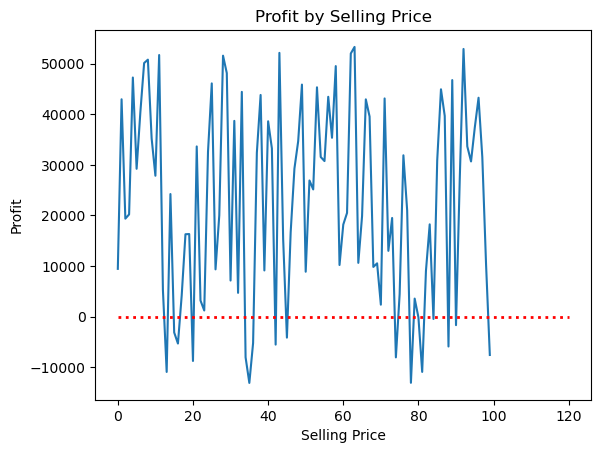

In [164]:
plt.plot(model3_results_df['profit'])
plt.xlabel('Scenario')
plt.ylabel('Profit')
plt.title('Profit Plot')
plt.hlines(y=0.2, xmin=0, xmax=120, linewidth=2, color='r', linestyles='dotted')
#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show() # Depending on whether you use IPython or interactive mode, etc.


Text(0.5, 1.0, 'Profit Histogram')

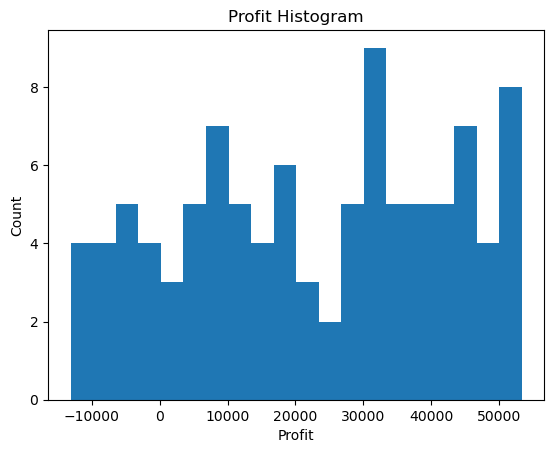

In [169]:
plt.hist(model3_results_df['profit'], bins=20)
plt.xlabel('Profit')
plt.ylabel('Count')
plt.title('Profit Histogram')

In [171]:
from scipy import stats

print(stats.percentileofscore(model3_results_df['profit'], 0) / 100.0)

0.17


In [149]:
profit_sim = pd.Series([(SingleProductSPF(fixed_cost, rand_UVC, selling_price, spf_constant, spf_linear, spf_quadratic)) 
               for d in rand_UVC])

profit_sim

0      {'fixed_cost': 5000, 'unit_variable_cost': arr...
1      {'fixed_cost': 5000, 'unit_variable_cost': arr...
2      {'fixed_cost': 5000, 'unit_variable_cost': arr...
3      {'fixed_cost': 5000, 'unit_variable_cost': arr...
4      {'fixed_cost': 5000, 'unit_variable_cost': arr...
                             ...                        
995    {'fixed_cost': 5000, 'unit_variable_cost': arr...
996    {'fixed_cost': 5000, 'unit_variable_cost': arr...
997    {'fixed_cost': 5000, 'unit_variable_cost': arr...
998    {'fixed_cost': 5000, 'unit_variable_cost': arr...
999    {'fixed_cost': 5000, 'unit_variable_cost': arr...
Length: 1000, dtype: object

TypeError: '<=' not supported between instances of 'SingleProductSPF' and 'SingleProductSPF'

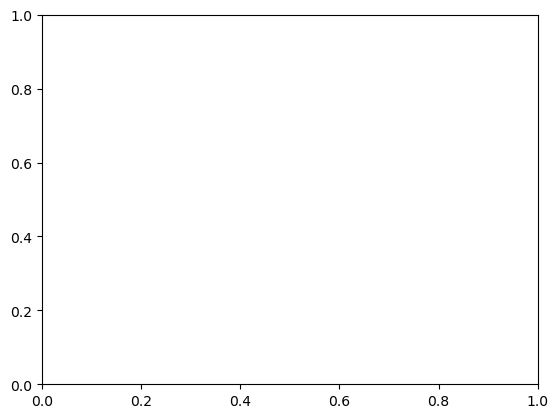

In [90]:

plt.hist(profit_sim, density=False);
